In [8]:
# Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
import re
import string
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression  # Ganti dari MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [9]:
df = pd.read_csv(r"C:\Users\USER1\Downloads\Indonesian Marketplace Product Reviews\reviews.csv")
df = df.dropna()  # Hapus baris kosong

In [10]:
# Preprocessing Teks
def clean_text(text):
    text = text.lower()  # ubah ke huruf kecil
    text = re.sub(r'http\S+', '', text)  # hapus link
    text = re.sub(r'[^\w\s]', '', text)  # hapus tanda baca
    text = re.sub(r'\d+', '', text)      # hapus angka
    text = re.sub(r'\s+', ' ', text)     # hapus spasi berlebih
    return text.strip()


In [12]:
df['clean_text'] = df['reviews'].apply(clean_text)

In [13]:
# Label (Positif/Negatif)
X = df['clean_text']
y = df['label']  # pastikan kolom ini adalah label sentimen

In [14]:
# TF-IDF
tfidf = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf.fit_transform(X).toarray()

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)


In [15]:
# Model: Logistic Regression
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

LogisticRegression(max_iter=200)

In [17]:
# Prediksi
y_pred = model.predict(X_test)

In [18]:
# Evaluasi
print("Akurasi:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Akurasi: 0.9221556886227545
Classification Report:
               precision    recall  f1-score   support

         0.0       0.87      1.00      0.93        84
         1.0       1.00      0.84      0.92        83

    accuracy                           0.92       167
   macro avg       0.93      0.92      0.92       167
weighted avg       0.93      0.92      0.92       167

Confusion Matrix:
 [[84  0]
 [13 70]]


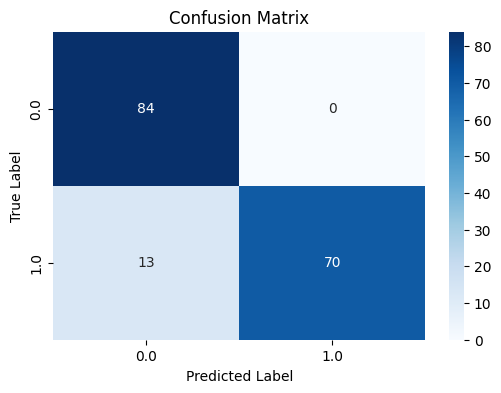

In [19]:
# --- [CONFUSION MATRIX PLOT] ---
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=model.classes_,
            yticklabels=model.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()